In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column


In [3]:
titanic_df=pd.read_csv('/content/titanic_dataset.csv' ,index_col='PassengerId')
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. Check the basic details of the dataset

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Fill in all the missing values present in all the columns in the dataset

In [6]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

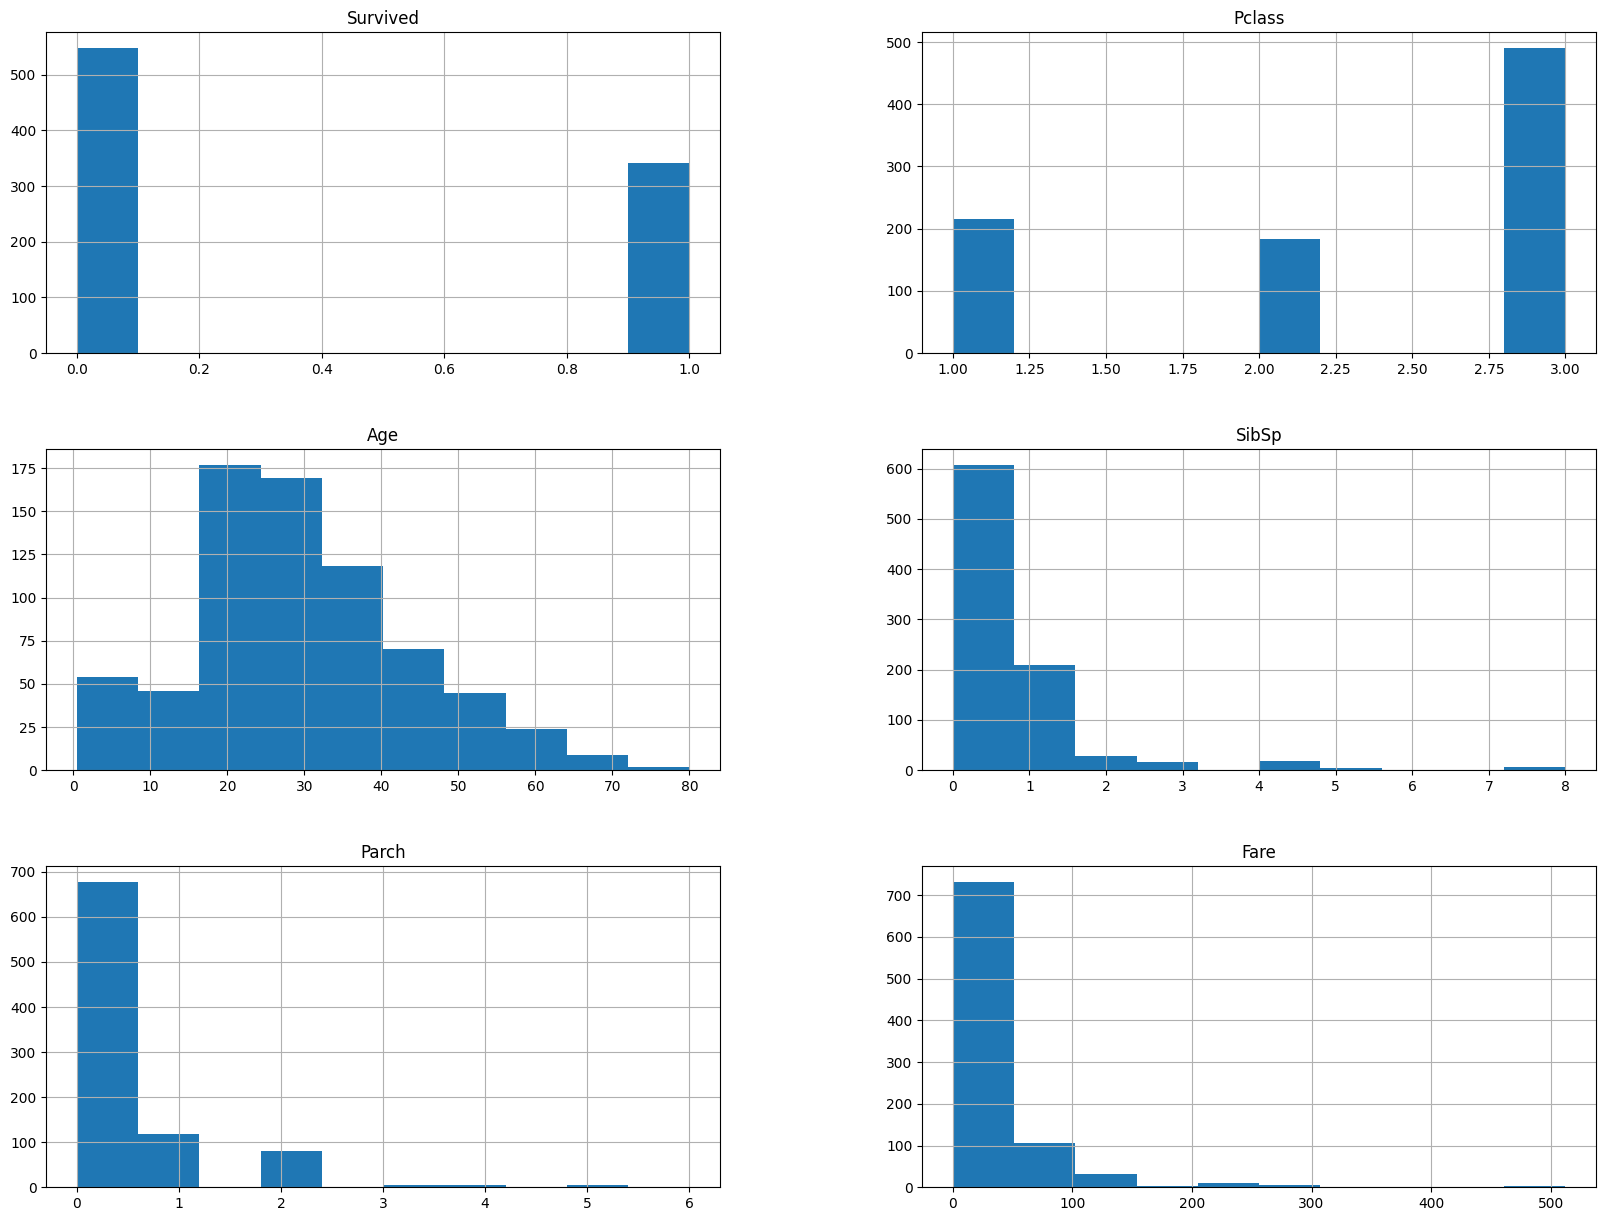

In [7]:
#frequency graph

freqgraph = titanic_df.select_dtypes(include = ['int64','float64'])
freqgraph.hist(figsize = (20, 15))

In [8]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#filling missing values

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0])
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])




In [10]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

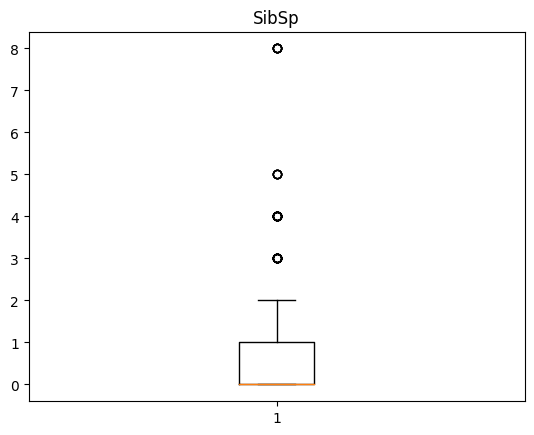

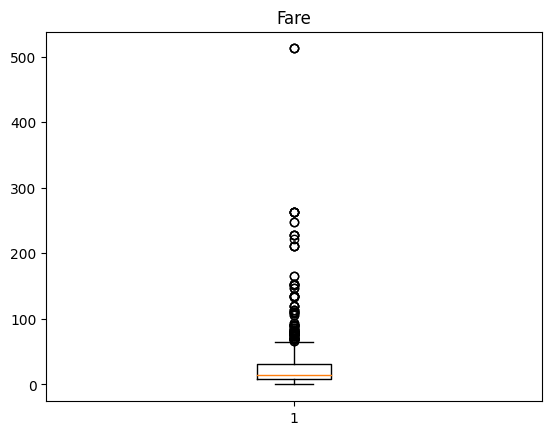

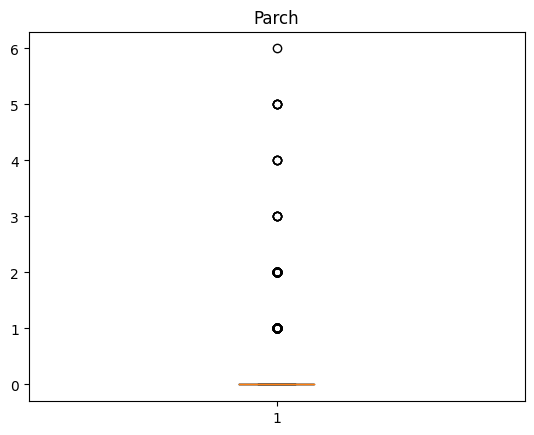

In [12]:
#finding outliers
num_columns = ['SibSp', 'Fare', 'Parch']
for i in num_columns:
  plt.figure()
  plt.boxplot(titanic_df[i])
  plt.title(i)
  plt.show()


In [20]:
#handling outliers for Sibsp
Q1 =np.percentile(titanic_df['SibSp'], 25, method = 'midpoint')
Q2 =np.percentile(titanic_df['SibSp'], 50, method = 'midpoint')
Q3 =np.percentile(titanic_df['SibSp'], 75, method = 'midpoint')

print("Q1 is:", Q1)
print("Q2 is:", Q2)
print("Q3 is:", Q3)







Q1 is: 0.0
Q2 is: 0.0
Q3 is: 1.0


In [14]:
IQR = Q3 - Q1
print(IQR)


1.0


In [15]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print('lower whisker:', low_lim)
print('uppwe whisker:', up_lim)

lower whisker: -1.5
uppwe whisker: 2.5


In [17]:
outlier = []
for x in titanic_df['SibSp']:
  if ((x < low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


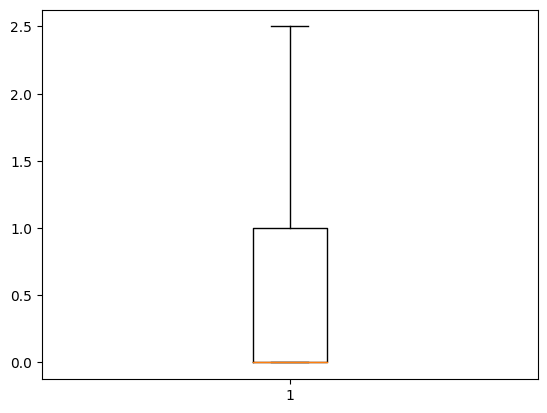

In [18]:

titanic_df['SibSp'] = titanic_df['SibSp'].clip(lower = low_lim, upper = up_lim)
plt.boxplot(titanic_df['SibSp'])
plt.show();

In [21]:
#handling outliers for Fare
Q1 =np.percentile(titanic_df['Fare'], 25, method = 'midpoint')
Q2 =np.percentile(titanic_df['Fare'], 50, method = 'midpoint')
Q3 =np.percentile(titanic_df['Fare'], 75, method = 'midpoint')

print("Q1 is:", Q1)
print("Q2 is:", Q2)
print("Q3 is:", Q3)

Q1 is: 7.9104
Q2 is: 14.4542
Q3 is: 31.0


In [22]:
IQR = Q3 - Q1
print(IQR)

23.0896


In [23]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print('lower whisker:', low_lim)
print('uppwe whisker:', up_lim)

lower whisker: -26.724
uppwe whisker: 65.6344


In [24]:
outlier = []
for x in titanic_df['Fare']:
  if ((x < low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


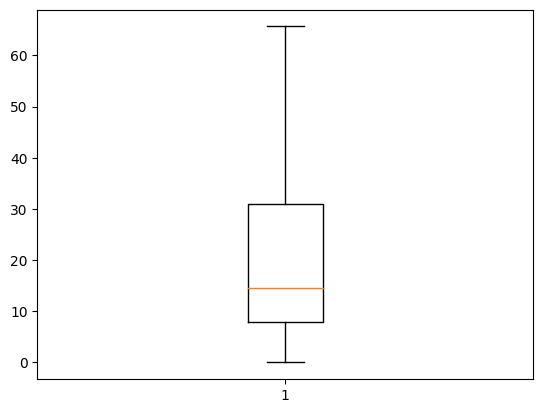

In [25]:
titanic_df['Fare'] = titanic_df['Fare'].clip(lower = low_lim, upper = up_lim)
plt.boxplot(titanic_df['Fare'])
plt.show();

In [26]:
#handling outliers for Parch

from scipy.stats import zscore
z_scores = zscore(titanic_df['Parch'])
print(z_scores)

PassengerId
1     -0.473674
2     -0.473674
3     -0.473674
4     -0.473674
5     -0.473674
         ...   
887   -0.473674
888   -0.473674
889    2.008933
890   -0.473674
891   -0.473674
Name: Parch, Length: 891, dtype: float64


In [27]:
threshold = 3
outliers_index = titanic_df.index[(z_scores > threshold) | (z_scores < -threshold)]
print(outliers_index)
t_data_final = titanic_df.drop(outliers_index)

Int64Index([14, 26, 87, 168, 361, 438, 439, 568, 611, 639, 679, 737, 775, 859,
            886],
           dtype='int64', name='PassengerId')


In [28]:
df1

NameError: name 'df1' is not defined

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  702 non-null    int64  
 1   Pclass    702 non-null    int64  
 2   Name      702 non-null    object 
 3   Sex       702 non-null    object 
 4   Age       702 non-null    float64
 5   SibSp     702 non-null    int64  
 6   Parch     702 non-null    int64  
 7   Ticket    702 non-null    object 
 8   Fare      702 non-null    float64
 9   Cabin     702 non-null    object 
 10  Embarked  702 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 65.8+ KB


6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [32]:
num_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
x = titanic_df[num_columns].drop('Survived', axis=1)
minmax = sk.MinMaxScaler(feature_range = (0,1))
x_mm = minmax.fit_transform(x)
x_mm = pd.DataFrame(x_mm)
x_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.170595,0.063599,0.366375
std,0.418036,0.163383,0.283298,0.134343,0.312056
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.120522
50%,1.000000,0.367921,0.000000,0.000000,0.220223
75%,1.000000,0.434531,0.400000,0.000000,0.472313
max,1.000000,1.000000,1.000000,1.000000,1.000000


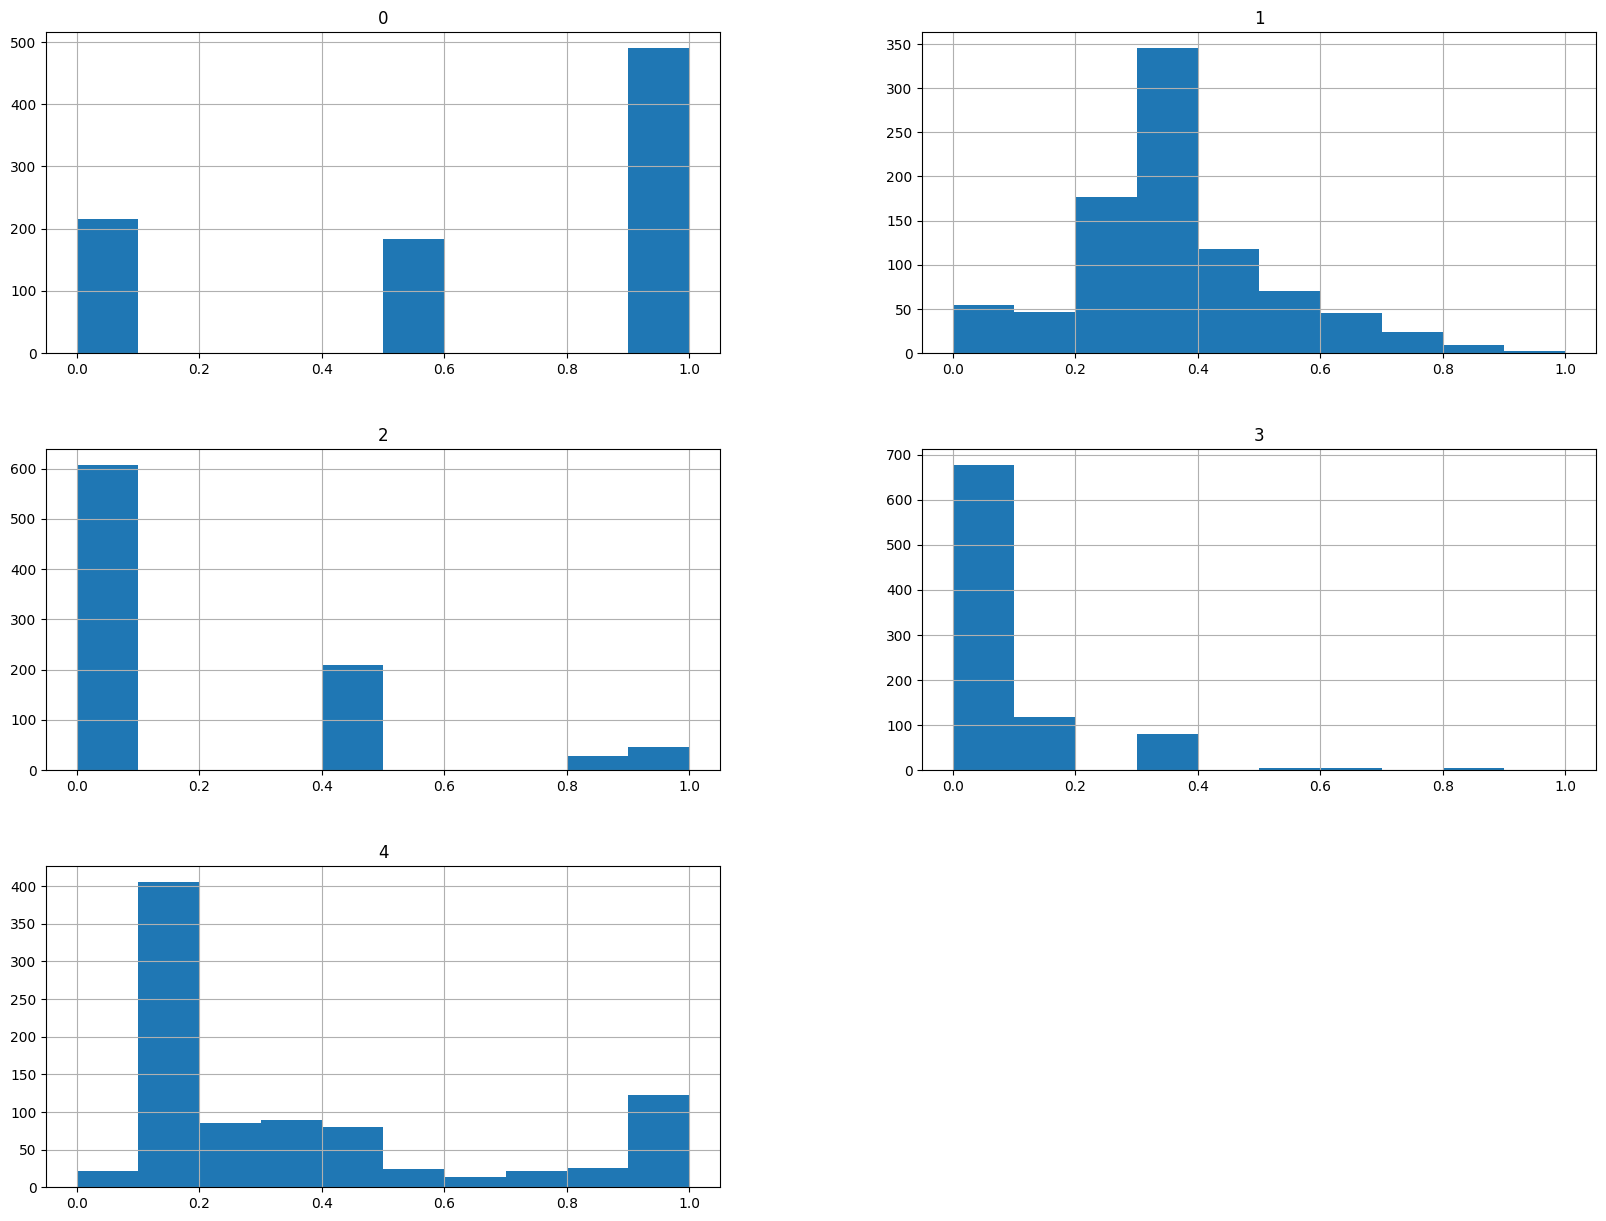

In [33]:
x_mm.hist(figsize=(20,15))
plt.show()